In [1]:
#Import Libraries
import numpy as np
import pandas as pd

In [2]:
## Let's create a small sample dataset on classification (contains binary outcome)
age=[23,18,27,16,40,29,24,21,34,32]
employ=['employed','unemployed','employed','unemployed','employed','employed','unemployed','unemployed','employed','employed']
salary=[100000,0,10000,0,4000000,1500000,0,0,500000,2000000]
buy=[1,1,0,0,0,1,1,1,0,1]

In [3]:
df=pd.DataFrame(
    {
        'age':age,
        'employment_type':employ,
        'salary':salary,
        'buy':buy
    }
)

In [4]:
df.head()

,age,employment_type,salary,buy
0,23,employed,100000,1
1,18,unemployed,0,1
2,27,employed,10000,0
3,16,unemployed,0,0
4,40,employed,4000000,0


In [5]:
df.isnull().sum()

age                0
employment_type    0
salary             0
buy                0
dtype: int64

In [7]:
employment = pd.get_dummies(df['employment_type'],drop_first=True)
df=pd.concat([df,employment],axis=1)
df.drop(['employment_type'],axis=1,inplace = True)

In [8]:
df.head()

,age,salary,buy,unemployed
0,23,100000,1,0
1,18,0,1,1
2,27,10000,0,0
3,16,0,0,1
4,40,4000000,0,0


In [9]:
#Y which is dependent data should be buy and X which is independent data should be without buy
Y= df['buy']
X = df.drop('buy',axis=1)

In [10]:
Y.head()
X.head()

,age,salary,unemployed
0,23,100000,0
1,18,0,1
2,27,10000,0
3,16,0,1
4,40,4000000,0


In [11]:
#Spliting Data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [12]:
#Applying Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # Creation of object of logistic Regression

In [14]:
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

In [15]:
#Now we create a confusion matrix to test the accuracy of our model

#Confusion matrix is used for classfication problems, to check the number of correct/incorrect predictions.
#It is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,prediction))

[[0 1]
 [2 0]]


<AxesSubplot:xlabel='age', ylabel='buy'>

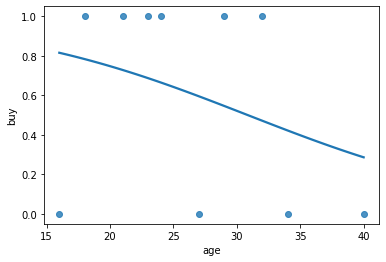

In [18]:
#Toplot Graph
import seaborn as sns
sns.regplot(x=X['age'],y=Y,data=df,logistic=True,ci=None)